# Import des bibliothèques

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv(f'diabetes_012_health_indicators_BRFSS2015.csv')
df.shape

(253680, 22)

In [3]:
df.head(10)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke   
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0  \
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7           0.0     1.0       1.0        1.0  25.0     1.0     0.0   
8           2.0     1.0       1.0        1.0  30.0     1.0     0.0   
9           0.0     0.0       0.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare   
0                   0.0           0.0     0.0  ...            1.0  \
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   
5                   0.0           1.0     1.0  ...            1.0   
6                   0.0           0.0     0.0  ...            1.0   
7                   0.0           1.0     0.0  ...            1.0   
8                   1.0           0.0     1.0  ...            1.0   
9                   0.0           0.0     0.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education   
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0  \
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   
5          0.0      2.0       0.0       2.0       0.0  1.0  10.0        6.0   
6          0.0      3.0       0.0      14.0       0.0  0.0   9.0        6.0   
7          0.0      3.0       0.0       0.0       1.0  0.0  11.0        4.0   
8          0.0      5.0      30.0      30.0       1.0  0.0   9.0        5.0   
9          0.0      2.0       0.0       0.0       0.0  1.0   8.0        4.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  
5     8.0  
6     7.0  
7     4.0  
8     1.0  
9     3.0  

[10 rows x 22 columns]

In [4]:
df.tail(10)

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke   
253670           2.0     1.0       1.0        1.0  25.0     0.0     0.0  \
253671           0.0     1.0       1.0        1.0  23.0     0.0     1.0   
253672           0.0     1.0       0.0        1.0  30.0     1.0     0.0   
253673           0.0     1.0       0.0        1.0  42.0     0.0     0.0   
253674           0.0     0.0       0.0        1.0  27.0     0.0     0.0   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare   
253670                   1.0           0.0     1.0  ...            1.0  \
253671                   1.0           0.0     0.0  ...            1.0   
253672                   1.0           1.0     1.0  ...            1.0   
253673                   0.0           1.0     1.0  ...            1.0   
253674                   0.0           0.0     0.0  ...            1.0   
253675                   0.0           0.0     1.0  ...            1.0   
253676                   0.0           0.0     0.0  ...            1.0   
253677                   0.0           1.0     1.0  ...            1.0   
253678                   0.0           0.0     1.0  ...            1.0   
253679                   1.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age   
253670          0.0      5.0      15.0       0.0       1.0  0.0  13.0  \
253671          1.0      4.0       0.0       5.0       0.0  1.0   8.0   
253672          0.0      3.0       0.0       0.0       0.0  1.0  12.0   
253673          0.0      3.0      14.0       4.0       0.0  1.0   3.0   
253674          0.0      1.0       0.0       0.0       0.0  0.0   3.0   
253675          0.0      3.0       0.0       5.0       0.0  1.0   5.0   
253676          0.0      4.0       0.0       0.0       1.0  0.0  11.0   
253677          0.0      1.0       0.0       0.0       0.0  0.0   2.0   
253678          0.0      3.0       0.0       0.0       0.0  1.0   7.0   
253679          0.0      2.0       0.0       0.0       0.0  0.0   9.0   

        Education  Income  
253670        6.0     4.0  
253671        3.0     2.0  
253672        2.0     1.0  
253673        6.0     8.0  
253674        6.0     5.0  
253675        6.0     7.0  
253676        2.0     4.0  
253677        5.0     2.0  
253678        5.0     1.0  
253679        6.0     2.0  

[10 rows x 22 columns]

In [5]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
df = df.rename(columns={'Diabetes_012': 'Diabetes_target'})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_target       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
df.isnull().sum()

Diabetes_target         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [9]:
df.duplicated().sum()

23899

In [10]:
df = df.drop_duplicates()
df.shape

(229781, 22)

In [11]:
df.describe(include='all').T

count       mean       std   min   25%   50%   75%   
Diabetes_target       229781.0   0.325627  0.724623   0.0   0.0   0.0   0.0  \
HighBP                229781.0   0.454441  0.497921   0.0   0.0   0.0   1.0   
HighChol              229781.0   0.441760  0.496598   0.0   0.0   0.0   1.0   
CholCheck             229781.0   0.959535  0.197047   0.0   1.0   1.0   1.0   
BMI                   229781.0  28.685670  6.786360  12.0  24.0  27.0  32.0   
Smoker                229781.0   0.465661  0.498821   0.0   0.0   0.0   1.0   
Stroke                229781.0   0.044756  0.206767   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  229781.0   0.103216  0.304241   0.0   0.0   0.0   0.0   
PhysActivity          229781.0   0.733355  0.442206   0.0   0.0   1.0   1.0   
Fruits                229781.0   0.612966  0.487073   0.0   0.0   1.0   1.0   
Veggies               229781.0   0.794813  0.403839   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     229781.0   0.060710  0.238798   0.0   0.0   0.0   0.0   
AnyHealthcare         229781.0   0.946075  0.225871   0.0   1.0   1.0   1.0   
NoDocbcCost           229781.0   0.092810  0.290167   0.0   0.0   0.0   0.0   
GenHlth               229781.0   2.601151  1.064685   1.0   2.0   3.0   3.0   
MentHlth              229781.0   3.505373  7.713725   0.0   0.0   0.0   2.0   
PhysHlth              229781.0   4.675178  9.046568   0.0   0.0   0.0   4.0   
DiffWalk              229781.0   0.185507  0.388709   0.0   0.0   0.0   0.0   
Sex                   229781.0   0.439231  0.496295   0.0   0.0   0.0   1.0   
Age                   229781.0   8.086582  3.093809   1.0   6.0   8.0  10.0   
Education             229781.0   4.980568  0.992895   1.0   4.0   5.0   6.0   
Income                229781.0   5.890383  2.092477   1.0   5.0   6.0   8.0   

                       max  
Diabetes_target        2.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

# Répartitions des classes de 'Diabetes_target'

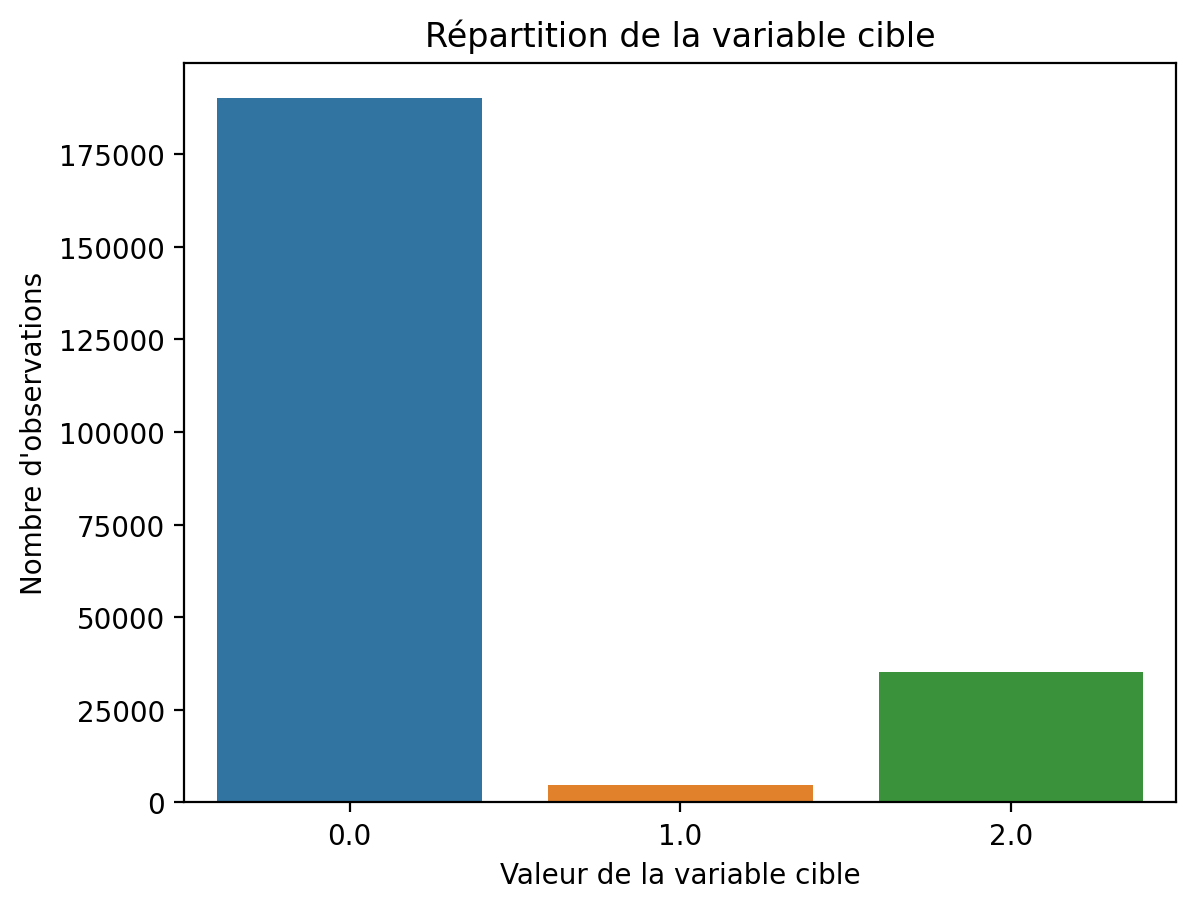

In [12]:
sns.countplot(x='Diabetes_target', data=df)
plt.title('Répartition de la variable cible')
plt.xlabel('Valeur de la variable cible')
plt.ylabel('Nombre d\'observations')
plt.show()

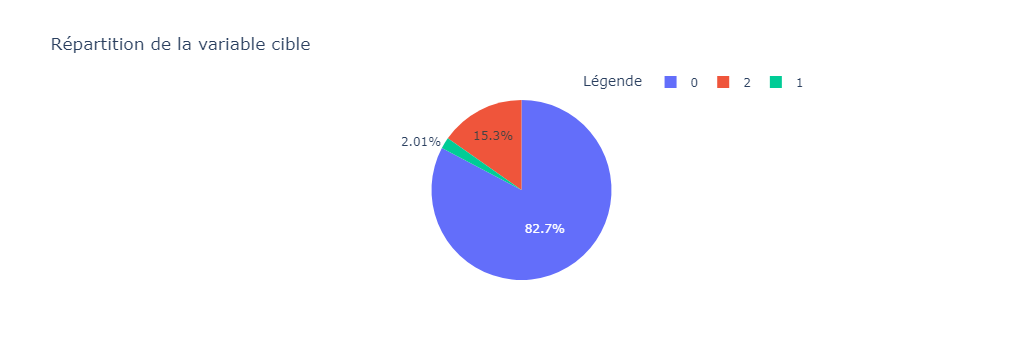

In [13]:
counts = df['Diabetes_target'].value_counts()

# Tracer un diagramme circulaire de la variable cible avec Plotly Express
fig = px.pie(values=counts.values, names=counts.index, title='Répartition de la variable cible')

# Afficher la légende
fig.update_layout(legend=dict(title='Légende', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

# Afficher le diagramme circulaire
fig.show()

# Fusion des classes 1 et 2

Étant donné que le nombre de diabétiques est faible, une répartition équitable des trois classes entraînerait une perte importante de données. Pour éviter cela, une approche consiste à regrouper les classes 1 et 2 en une seule classe diabétique. Les individus pré-diabétiques sont inclus dans cette classe pour tenir compte du risque de développer un diabète. Ensuite, pour équilibrer l'ensemble de données, on peut sélectionner au hasard des échantillons de diabétiques et de non-diabétiques de manière à ce que chaque groupe représente 50% de l'ensemble de données. Il convient de souligner que certains individus peuvent ne pas encore avoir été diagnostiqués comme pré-diabétiques ou diabétiques.

In [14]:
#fusion des classes 1 et 2 ie considerer les prediabetiques comme diabetique
df['Diabetes_target'] = df['Diabetes_target'].replace({2:1})

print("nombre de dupliqués après la fusion : ",df.duplicated().sum())
df = df.drop_duplicates()
print("taille des données apès le nettoyage des redondances :",df.shape)

nombre de dupliqués après la fusion :  69
taille des données apès le nettoyage des redondances : (229712, 22)


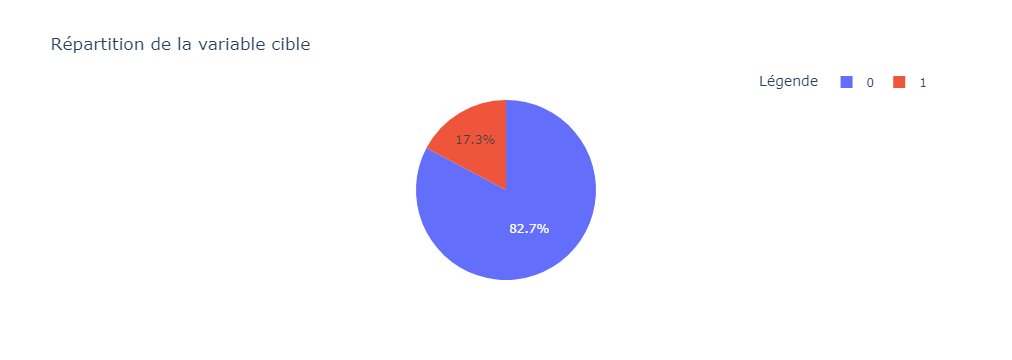

In [15]:
counts = df['Diabetes_target'].value_counts()

# Tracer un diagramme circulaire de la variable cible avec Plotly Express
fig = px.pie(values=counts.values, names=counts.index, title='Répartition de la variable cible')

# Afficher la légende
fig.update_layout(legend=dict(title='Légende', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

# Afficher le diagramme circulaire
fig.show()

In [16]:
print(df.groupby(['Diabetes_target']).size());

Diabetes_target
0.0    190055
1.0     39657
dtype: int64


## Répartition équitable des classes

In [17]:
#prendre les lignes avec classe 1
cond_1 = df['Diabetes_target'] == 1
df_1 = df[cond_1]

#prendre les lignes avec classe 0
cond_0 = df['Diabetes_target'] == 0
df_0 = df[cond_0]

#prendre au hasard des lignes de classe 0 de meme taille que ceux de classe 1
df_0_random = df_0.take(np.random.permutation(len(df_0))[:len(df_1)])

#fusionner les deux dataframe
df_equal = pd.concat([df_0_random, df_1], ignore_index=True)

#randomiser le data frame
df_equal_random = df_equal.take(np.random.permutation(len(df_equal)))

df_equal_random.groupby(['Diabetes_target']).size()

Diabetes_target
0.0    39657
1.0    39657
dtype: int64

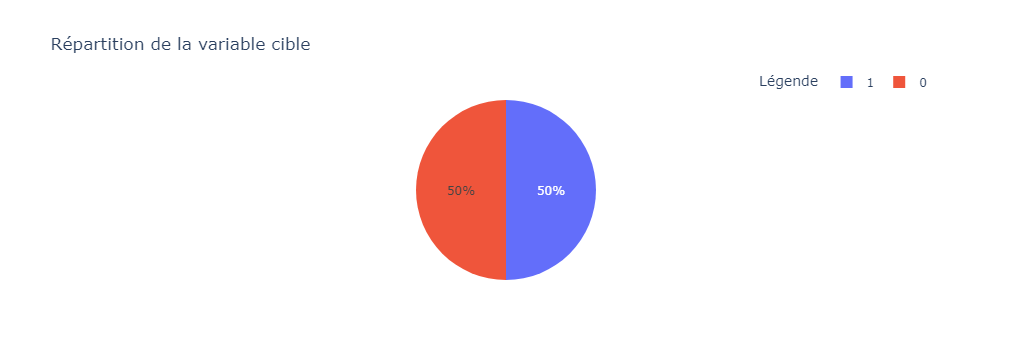

In [18]:
df = df_equal_random
counts = df['Diabetes_target'].value_counts()

# Tracer un diagramme circulaire de la variable cible avec Plotly Express
fig = px.pie(values=counts.values, names=counts.index, title='Répartition de la variable cible')

# Afficher la légende
fig.update_layout(legend=dict(title='Légende', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

# Afficher le diagramme circulaire
fig.show()

# Comprendre les correlations

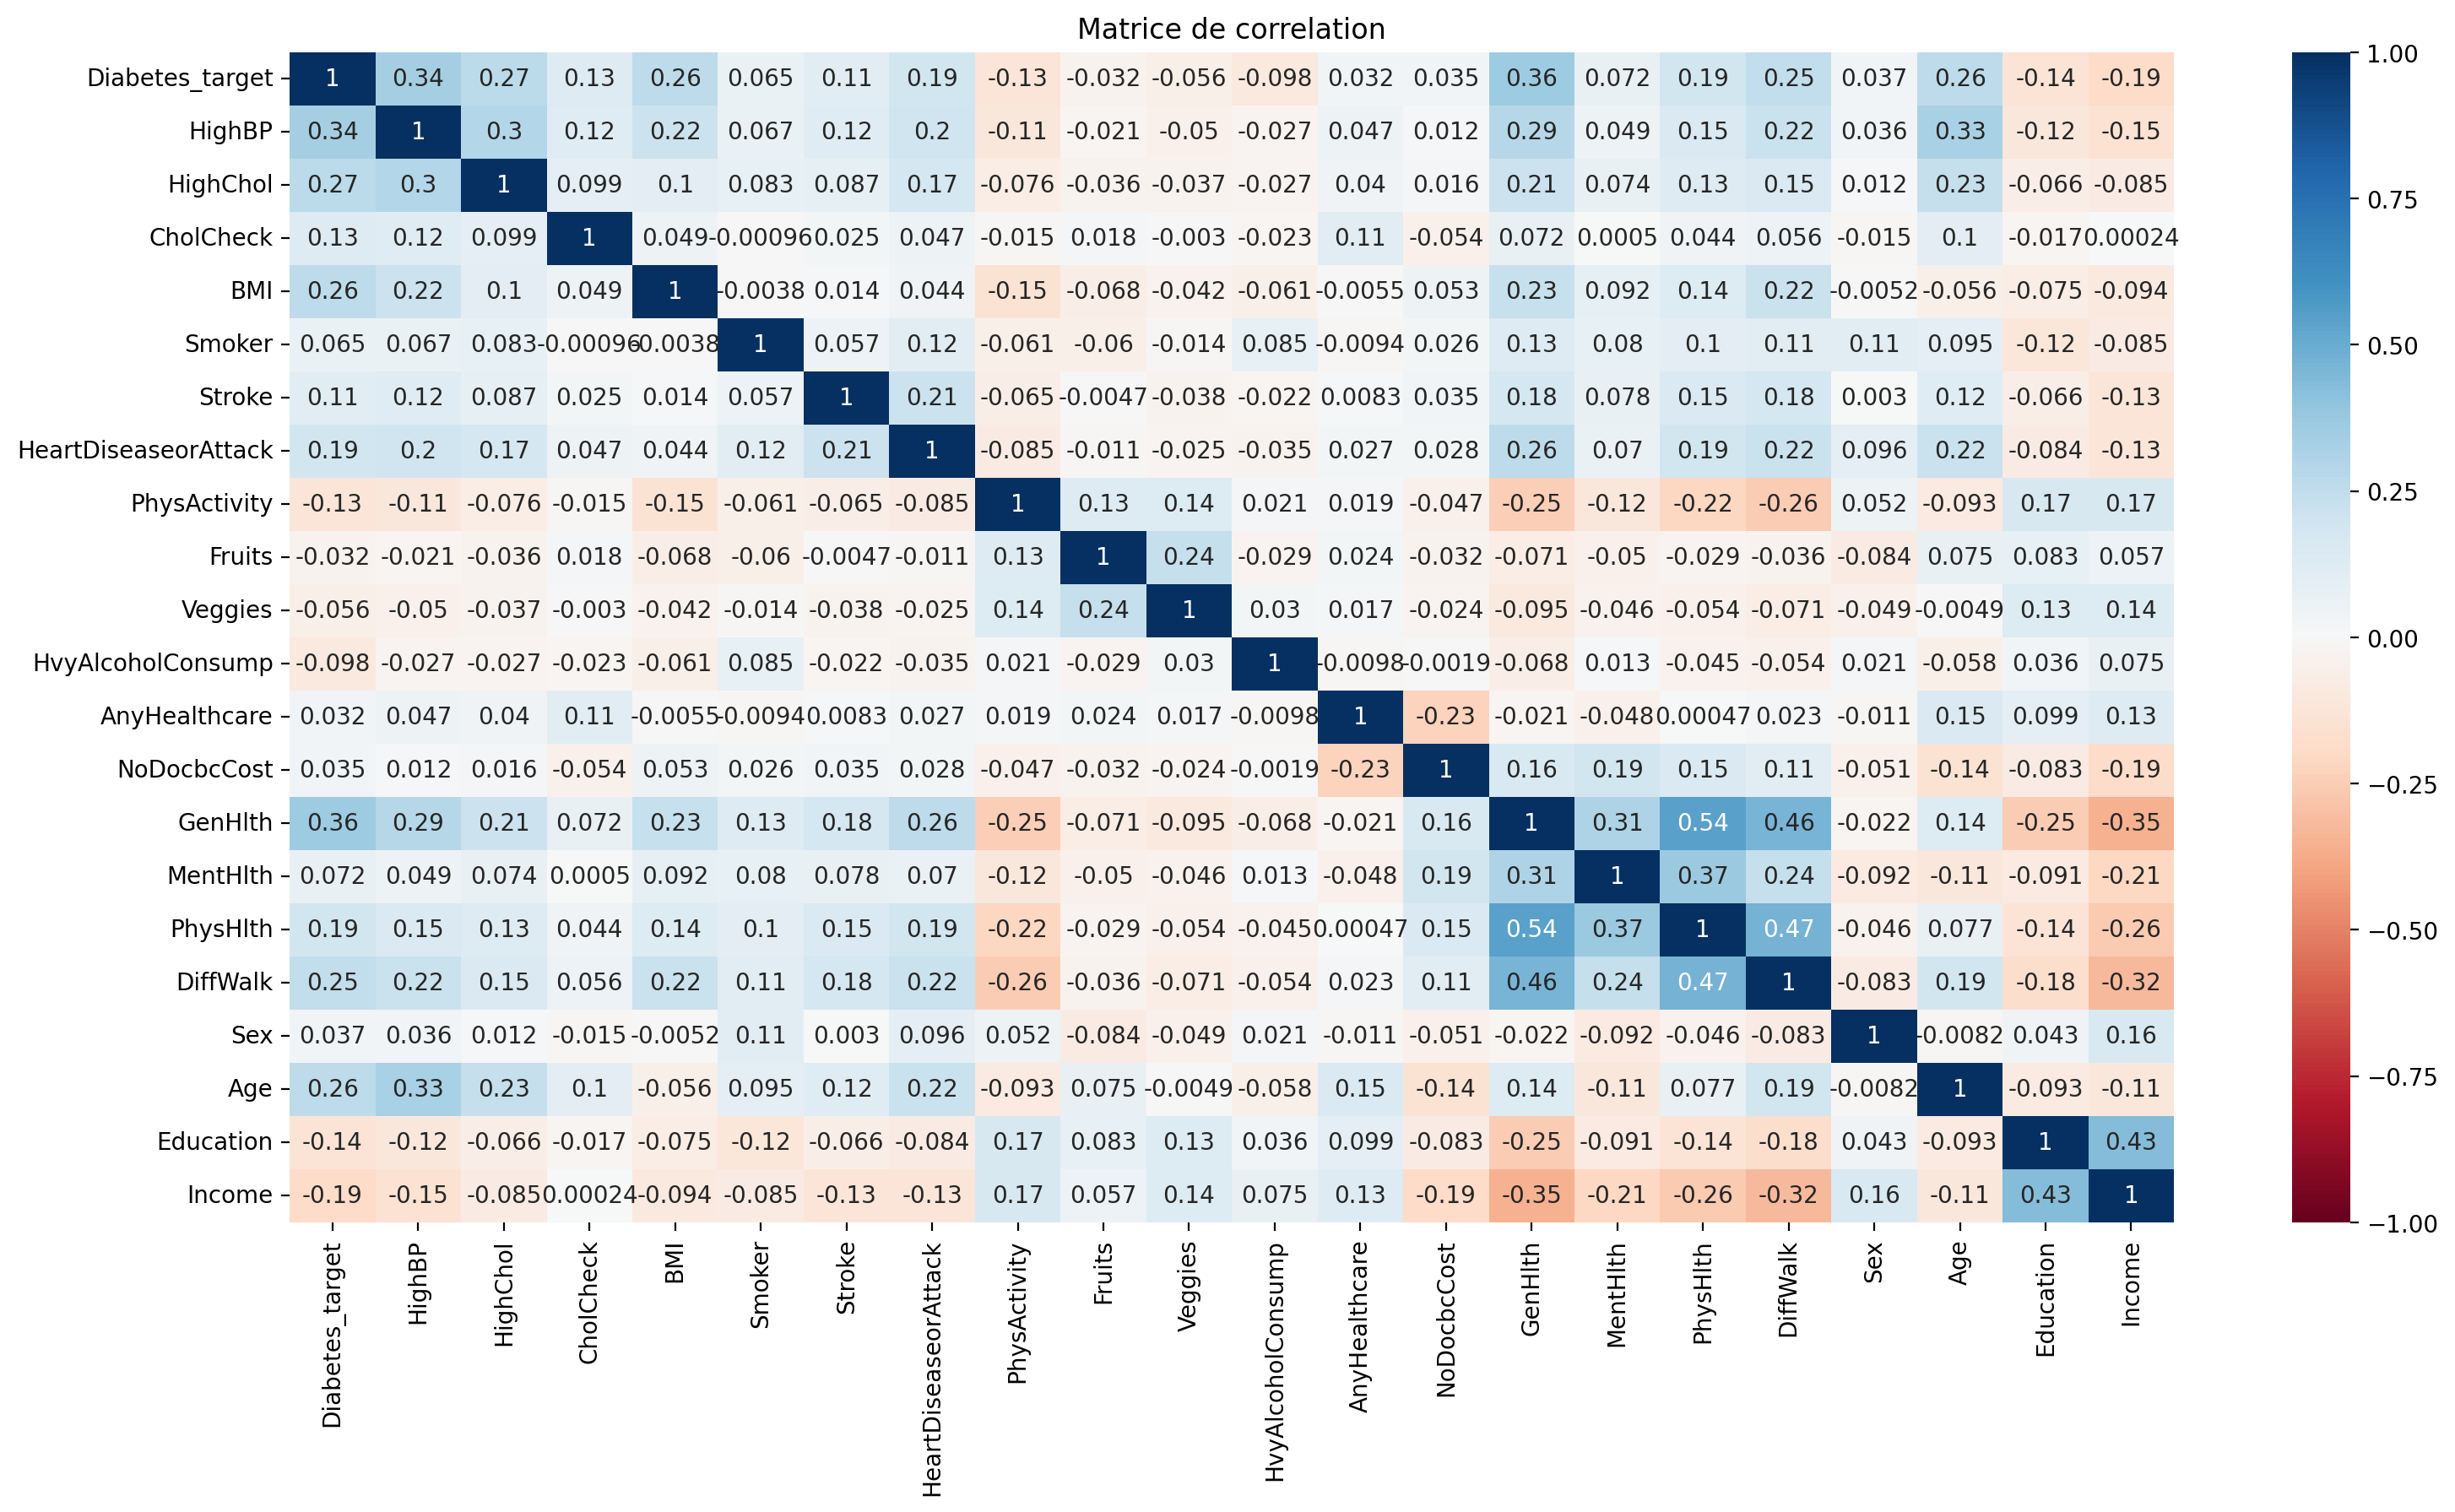

In [19]:
matrice_corr = df.corr()
plt.figure(figsize=(18, 9))
sns.heatmap(matrice_corr,  annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Matrice de correlation')
plt.show()

## Dinstinction entre variables continues et discretes

In [20]:
df.nunique()

Diabetes_target          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     81
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

##### BMI a l'air la seule variable étant continue d'après le nombre de valeurs uniques qu'elle compte et d'après son sens "Body Mass Index" 

## Distribution de chaque variable

In [21]:
def type_vars_extract(df):
    '''
    fonction qui prend en entrée notre data frame et renvoie les noms des colonnes pour chaque type de variables
    
    entre:
        - df : data frame
    sortie :
        - bool_vars : liste des noms de colonnes qui prennent comme valeurs soit 0 soit 1
        - num_vars : liste des noms de colonnes qui prennent des valeurs discretes en dehors des variables booleenes
        - cont_vars : liste des noms de colonnes qui prennent des valeurs continues
    '''
    
    bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_target'))
    num_vars = [var for var in df.columns[1:] if var not in bool_vars and var!= 'BMI']
    cont_vars = ['BMI']
    
    return bool_vars, num_vars, cont_vars

### Histogrammes de variables discrètes mais non booléennes

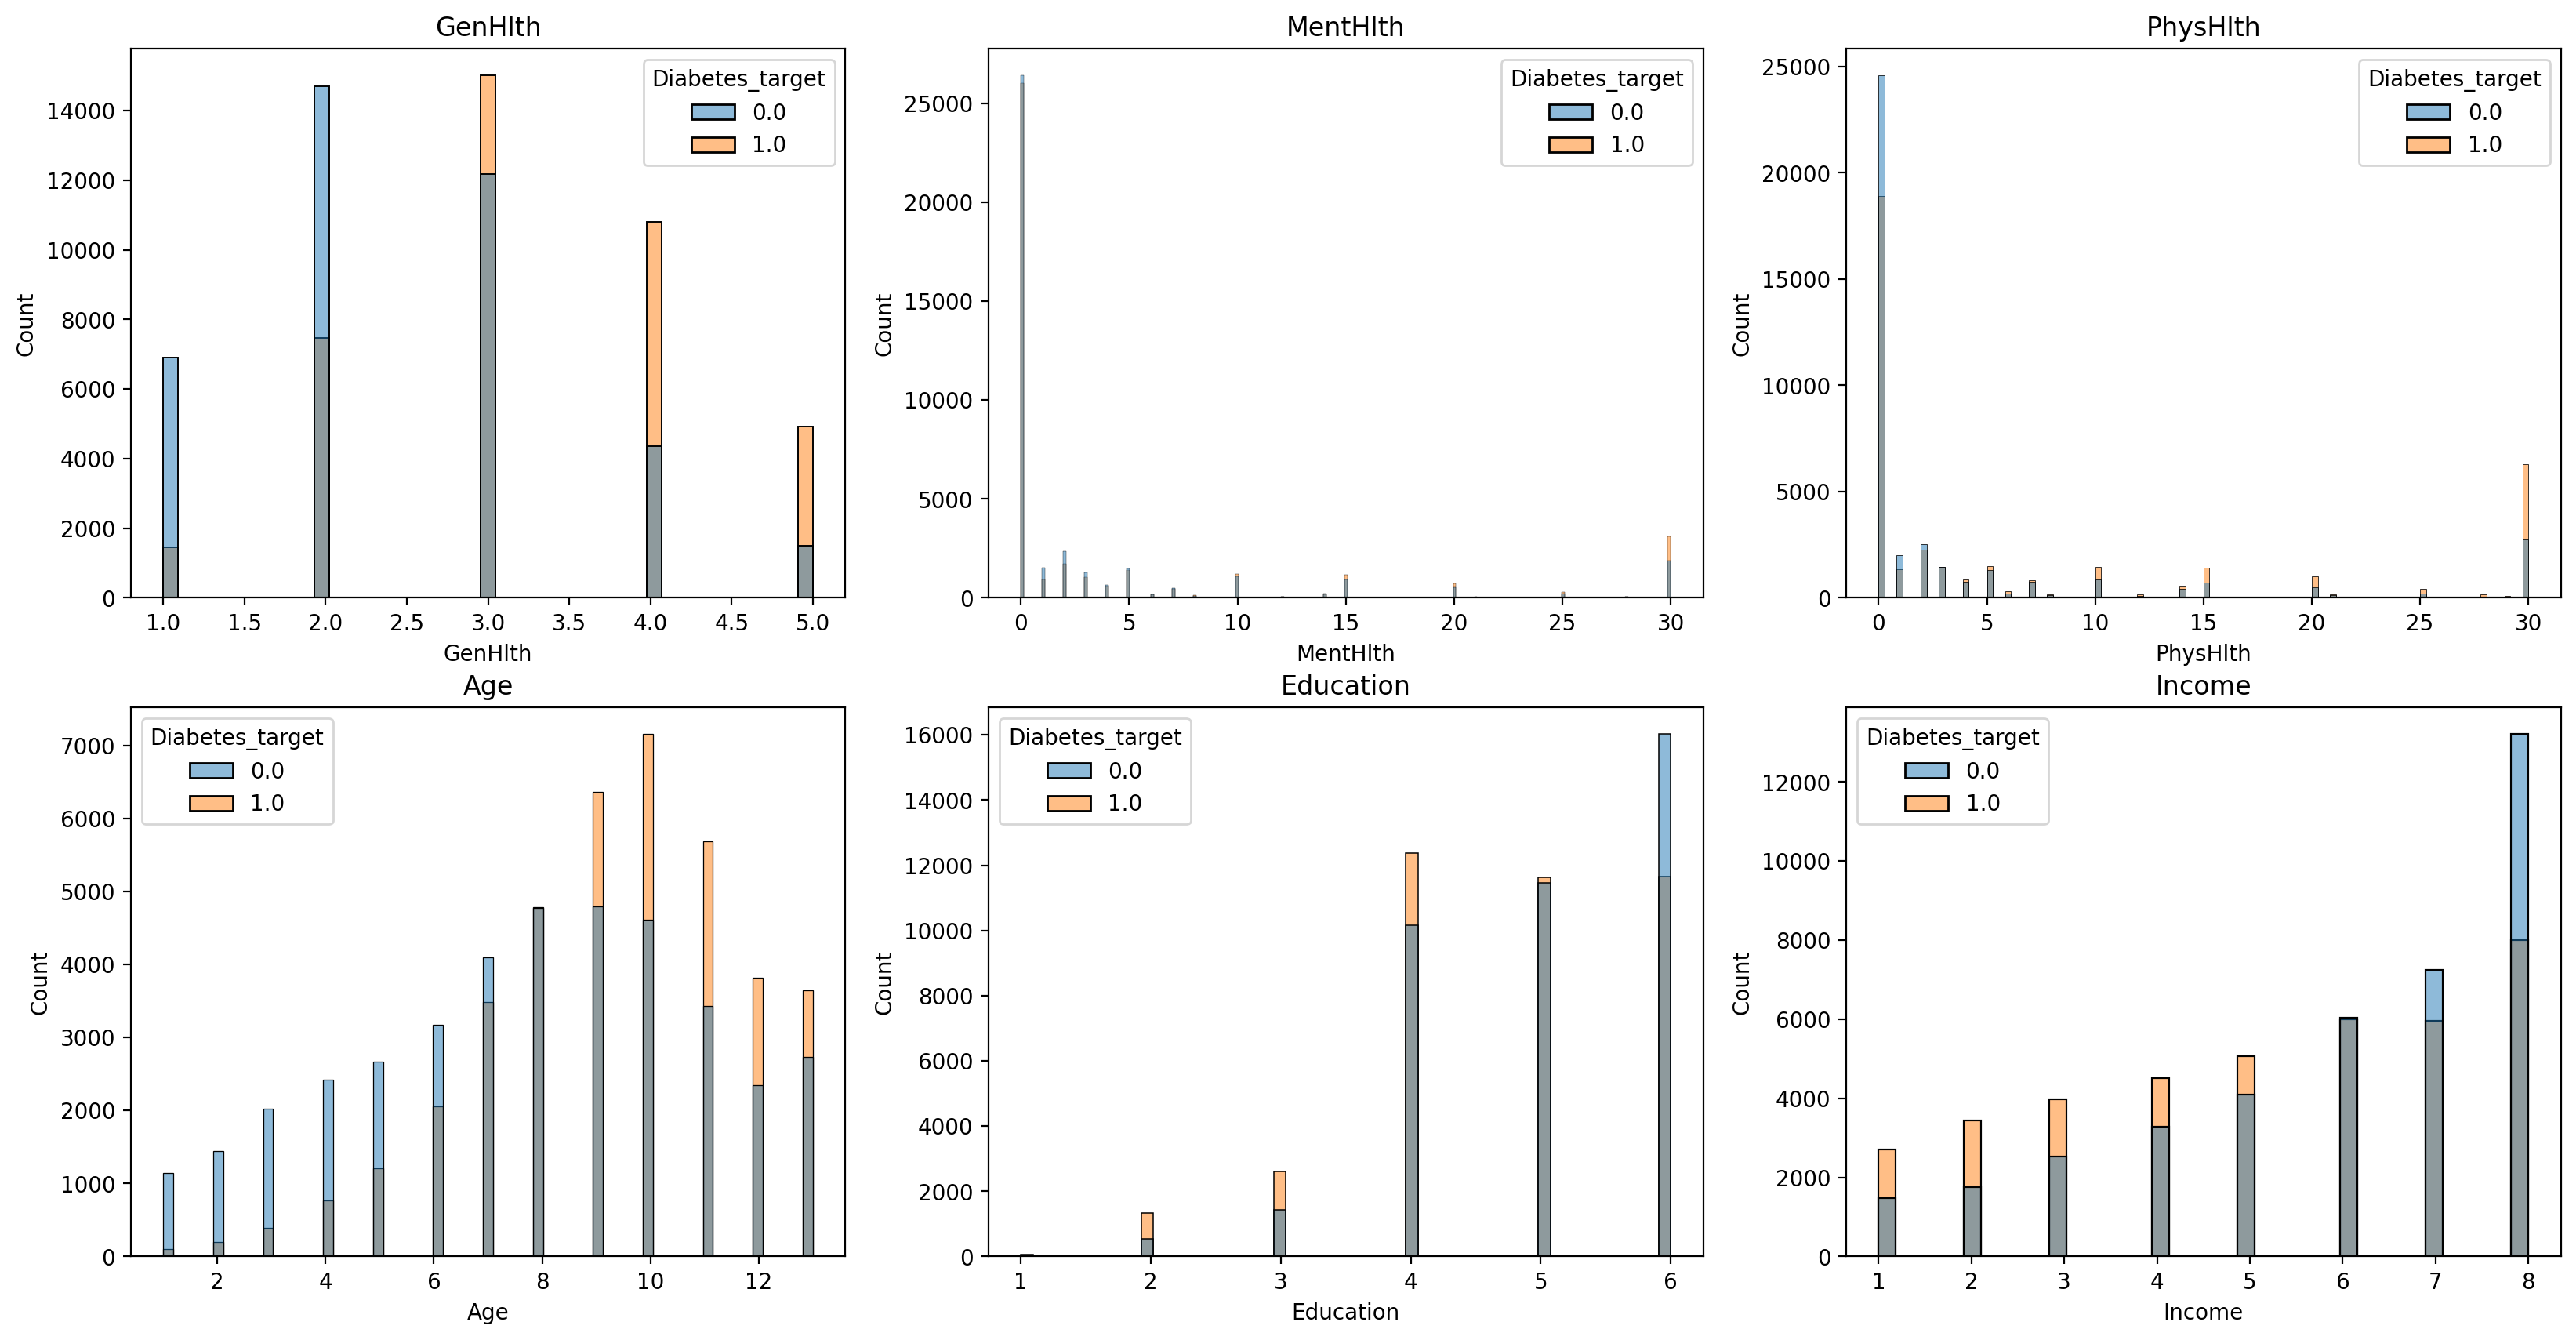

In [22]:
bool_vars, num_vars, cont_vars = type_vars_extract(df)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, var in enumerate(num_vars):
    sns.histplot(data=df, x=var, hue='Diabetes_target', ax=ax[i//3, i%3], kde=False)
    ax[i//3, i%3].set_title(var)

### Répartition des variables booléennes

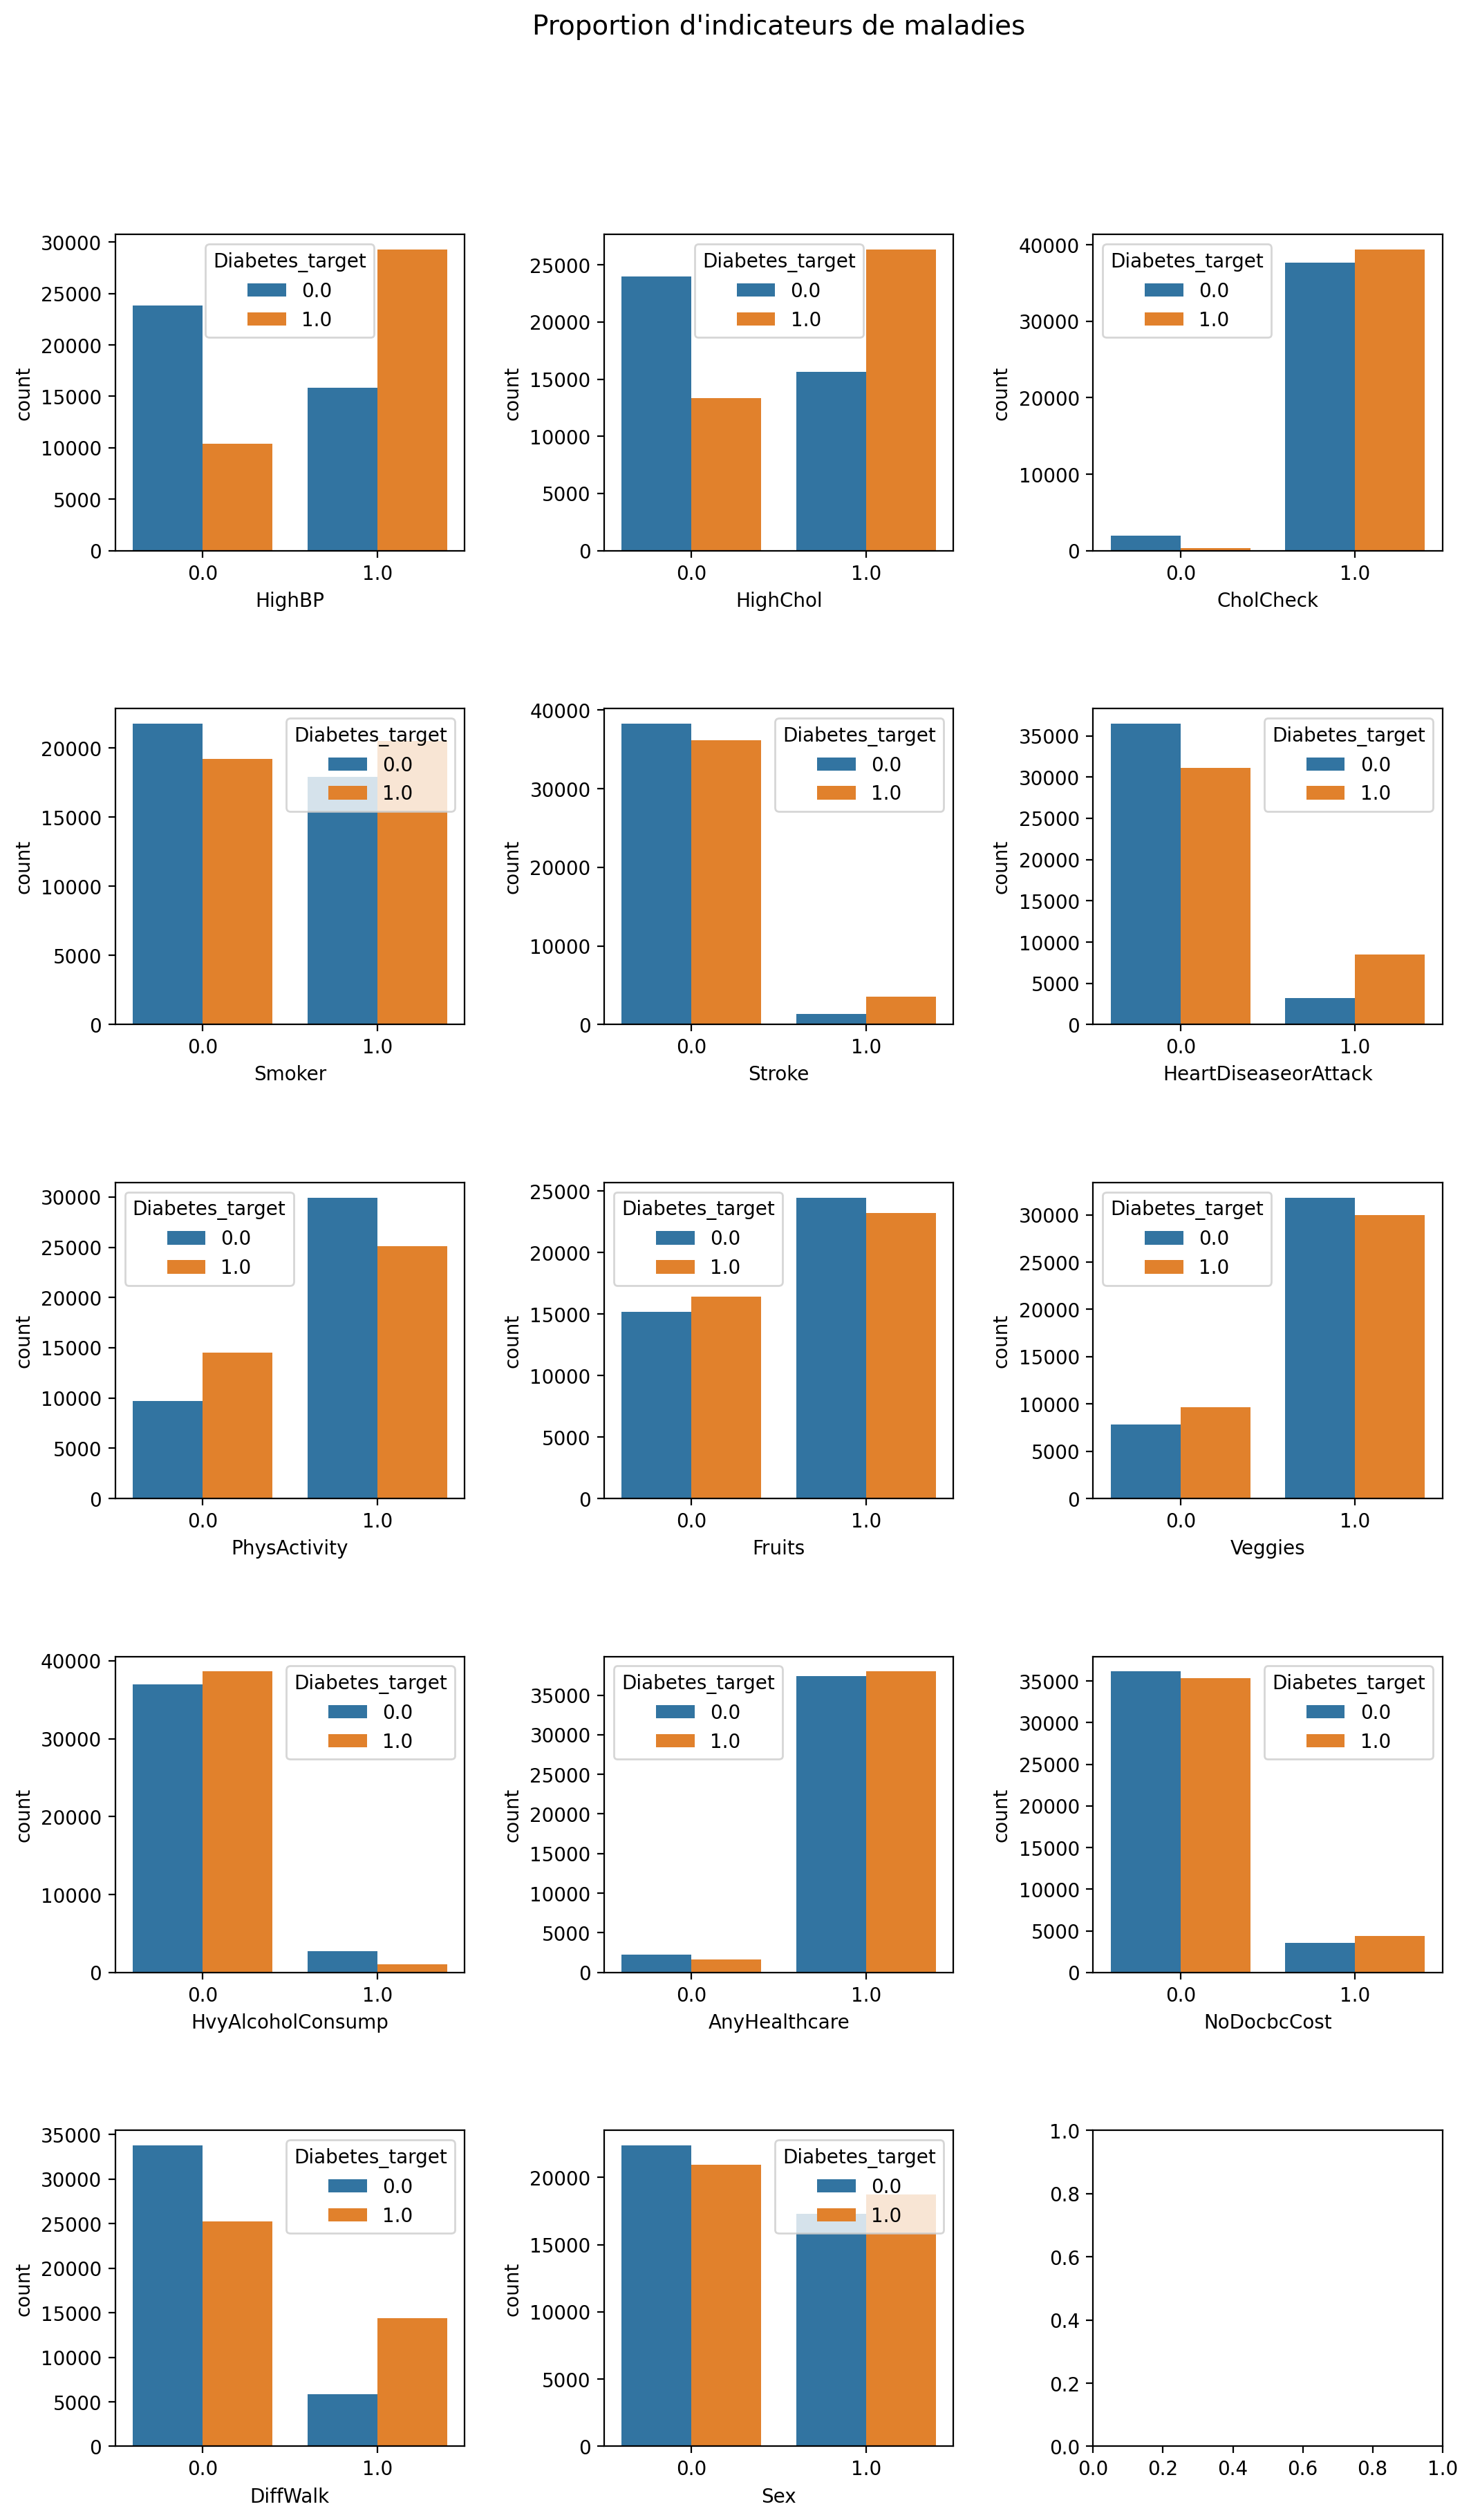

In [23]:
fig, ax = plt.subplots(5, 3, figsize=(12, 20))
for i, var in enumerate(bool_vars):
    sns.countplot(data=df, x=var, hue='Diabetes_target', ax=ax[i//3, i%3])
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9, hspace=0.5, wspace=0.4)
plt.suptitle('Proportion d\'indicateurs de maladies', fontsize=14)
plt.show();

### Densité de la variable BMI

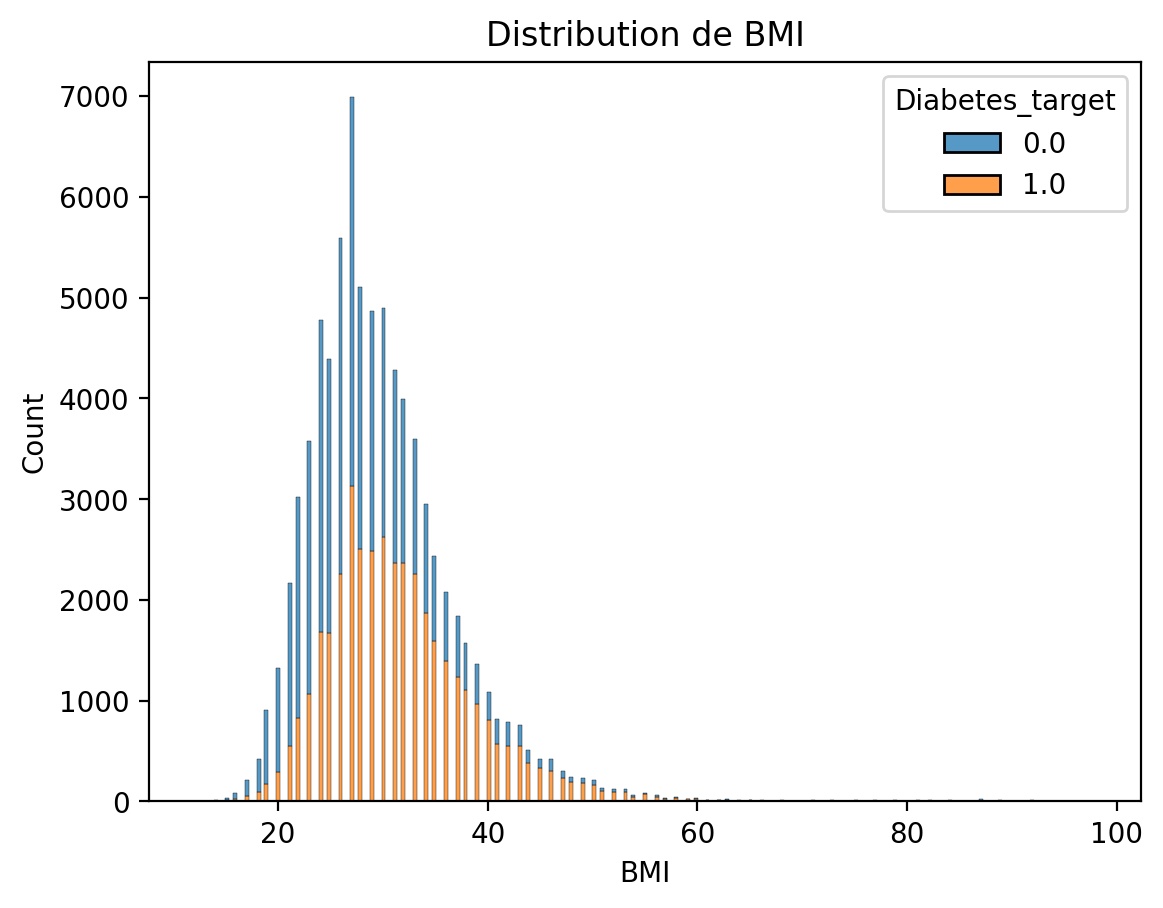

In [24]:
sns.histplot(data=df, x='BMI', hue='Diabetes_target', multiple='stack')
plt.title('Distribution de BMI')
plt.show()

## Plan à suivre

Ici, nous avons décidé d'encoder les variables discrètes non booléennes en vecteurs one-hot et de standardiser la variable BMI.

In [25]:
def preprocessing(df, num_vars, cont_vars, bool_vars):
    '''
    fonction qui prend en entrée :
        - df : notre data frame sans la variable target
        - bool_vars : liste des noms de colonnes qui prennent comme valeurs soit 0 soit 1
        - num_vars : liste des noms de colonnes qui prennent des valeurs discretes en dehors des variables booleenes
        - cont_vars : liste des noms de colonnes qui prennent des valeurs continues
        
    qui standarise les colonnes de cont_vars et encode en one_hot_vector les colonnes de num_vars et fusionne toutes les données avec les colonnes de bool_vars
    
    et renvoir un ndarray :
        X : un ndarray contenant les données du data frame après le preprocessing
    '''

    num_transformer = OneHotEncoder()

    # Créer une échelleur standard pour la variable continue
    cont_transformer = StandardScaler()

    # Créer un transformateur de colonnes
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_vars),
            ('cont', cont_transformer, cont_vars)
        ])
    X = preprocessor.fit_transform(df)
    X = np.hstack((X.toarray(), df[bool_vars].values))
    return X


In [26]:
# Extraire Nos données sous forme de tableaux numpy X : variables prédictives et y : variable cible
X = preprocessing(df.drop('Diabetes_target', axis=1), num_vars, cont_vars, bool_vars)
y = df['Diabetes_target']

# Séléction de modèles à tester

Ici, nous allons tester de nombreux modèles de classification avec différents paramètres. Nous commencerons par chercher les meilleurs paramètres pour chaque modèle individuellement, puis nous tenterons de déterminer le meilleur modèle parmi eux.

In [27]:
models = [
    {
        'name': 'Decision Tree',
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10, 12, 16]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [2, 10, 20,30, 50, 100],
            'max_depth': [2, 4, 6, 8, 10, 12, 16]
        }
    },
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 0.5, 1.0, 5.0],
            'max_iter' : [1000, 2000, 3000]

        }
    },
        {
        'name': 'SVM',
        'model': LinearSVC(),
        'params': {
            'C': [0.1, 0.5, 1.0, 5.0],
            'max_iter' : [30000, 40000, 50000]
        }
    },
    
    {
        'name': 'Naive Bayes Gaussien',
        'model': GaussianNB(),
        'params': {}
    },
    {
        'name': 'K-Nearest Neighbors',
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    {
        'name': 'Gradient Boosting',
        'model': GradientBoostingClassifier(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10, 12, 16],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'n_estimators': [50, 100, 200, 300]
        }
    }, 
     {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10, 12, 16],
            'learning_rate': [0.001, 0.01, 0.1, 1.0],
            'n_estimators': [50, 100, 200, 300]
        }
    }
    
]

## Répartition des données d entrainement et de test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrainement et choix du modèle

On fera très attention au choix de métrique de comparaison , en effet ici dans notre contexte l accuracy est tres trompeur,le F-score est mieux adapté car on ne veut pas avoir de faux negatifs (une personne non detectée malade alors qu elle l est) sans trop avoir de faux positifs (une personne detectée malade alors qu'elle ne l est pas )

### important : 
Ici l entrainement se fait sur un appareil avec une grande capacité mémoire (64 Gb de Ram), il se pourrait que sur un appareil simple l'espace mémoire et la capacité de calcul ne soient pas suffisants

## Score utilisé pour la comparaison et l'affichage :
##### Ici, nous utilisons le F-score pour les raisons que nous avons expliquées précédemment. Par conséquent, le score affiché sera le F-score. L'exactitude (accuracy) sera donc légèrement supérieure à ce score.

In [29]:
f1_scorer = make_scorer(fbeta_score, beta=1)
best_models = {}
for model in models:
    
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, n_jobs=-1, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    best_models[model['name']] = grid_search.best_estimator_
    
    print(f'Meilleurs paramètres pour {model["name"]}: {grid_search.best_params_}')
    print(f'Score d\'entraînement de {model["name"]}: {grid_search.best_score_:.3f}')
    print(f'Score de test de {model["name"]}: {grid_search.score(X_test, y_test):.3f}')
    print('---')

# Comparer les scores et choisir le meilleur modèle et ses meilleurs paramètres
best_model_name = max(best_models, key=lambda x: grid_search.best_score_)
best_model = best_models[best_model_name]
print(f'Meilleur modèle : {best_model_name}')
print(f'Paramètres : {best_model.get_params()}')

Meilleurs paramètres pour Decision Tree: {'max_depth': 8}
Score d'entraînement de Decision Tree: 0.719
Score de test de Decision Tree: 0.720
---
Meilleurs paramètres pour Random Forest: {'max_depth': 16, 'n_estimators': 100}
Score d'entraînement de Random Forest: 0.737
Score de test de Random Forest: 0.737
---
Meilleurs paramètres pour Logistic Regression: {'C': 5.0, 'max_iter': 1000}
Score d'entraînement de Logistic Regression: 0.736
Score de test de Logistic Regression: 0.743
---
Meilleurs paramètres pour SVM: {'C': 0.1, 'max_iter': 30000}
Score d'entraînement de SVM: 0.736
Score de test de SVM: 0.744
---
Meilleurs paramètres pour Naive Bayes Gaussien: {}
Score d'entraînement de Naive Bayes Gaussien: 0.535
Score de test de Naive Bayes Gaussien: 0.566
---
Meilleurs paramètres pour K-Nearest Neighbors: {'algorithm': 'kd_tree', 'n_neighbors': 7, 'weights': 'uniform'}
Score d'entraînement de K-Nearest Neighbors: 0.700
Score de test de K-Nearest Neighbors: 0.704
---


/opt/mamba/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Meilleurs paramètres pour Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Score d'entraînement de Gradient Boosting: 0.741
Score de test de Gradient Boosting: 0.746
---


/opt/mamba/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Meilleurs paramètres pour XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Score d'entraînement de XGBoost: 0.742
Score de test de XGBoost: 0.745
---
Meilleur modèle : Decision Tree
Paramètres : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Rapport de classification :
              precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      7995
         1.0       0.71      0.73      0.72      7868

    accuracy                           0.72     15863
   macro avg       0.72      0.72      0.72     15863
weighted avg       0.72      0.72      0.72     15863

l accuracy =  0.716636197440585


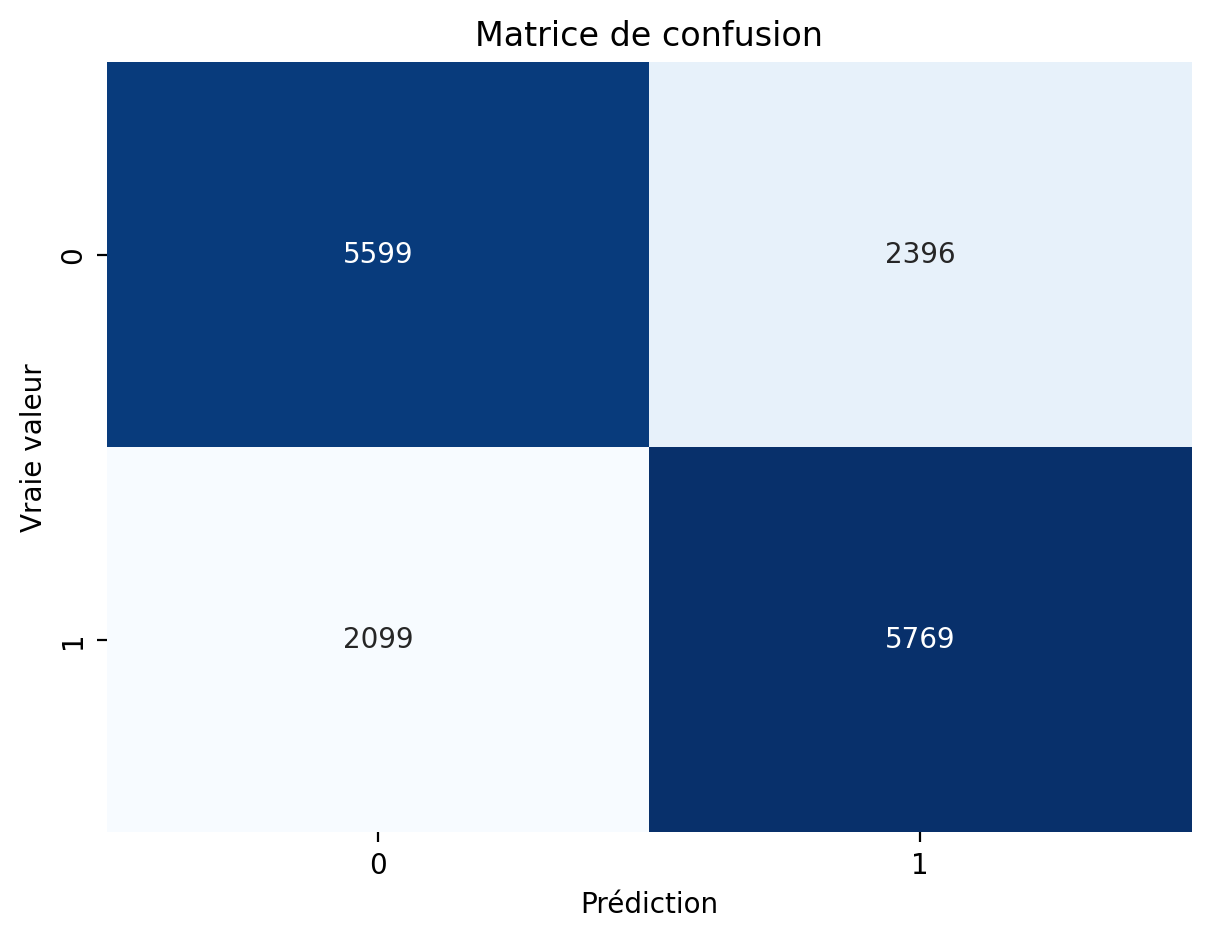

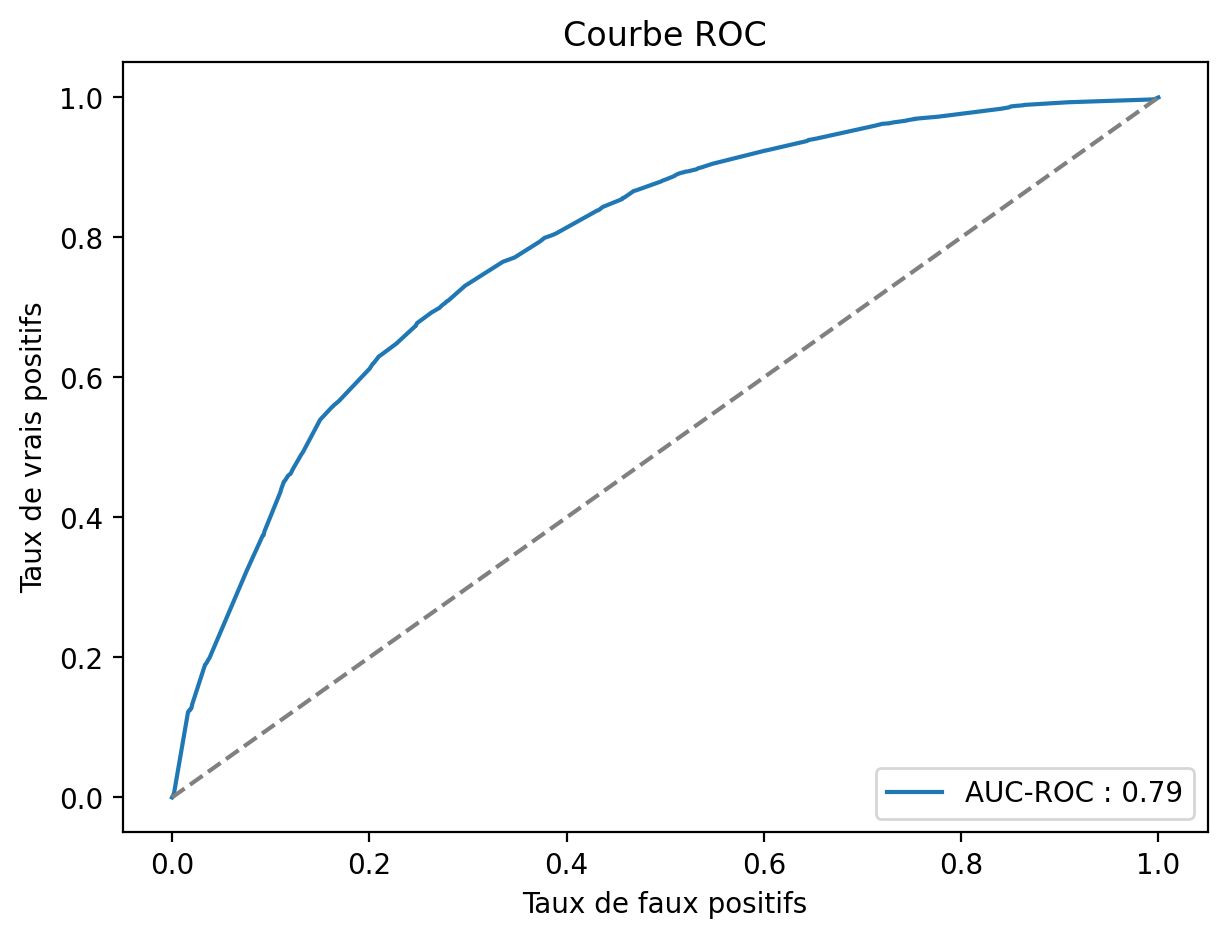

In [33]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Afficher le rapport de classification
print("Rapport de classification :")
print(classification_report(y_test, y_pred))
print("l accuracy = ",accuracy_score(y_test, y_pred))
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Prédiction")
plt.ylabel("Vraie valeur")
plt.title("Matrice de confusion")
plt.show()

# Calculer et afficher la courbe ROC et l'AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"AUC-ROC : {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

# Pour Prédire sur de nouvelles données

In [34]:
def predict(new_data, model = best_model):
    '''
    fonction qui prend de nouvelles données new_data dans le même format que notre data frame du début et dira si la personne est suceptible d'etre atteint ou pas de diabete
    '''
    bool_vars, num_vars, cont_vars = type_vars_extract(new_data)
    X = preprocessing(df.drop('Diabetes_target', axis=1), num_vars, cont_vars, bool_vars)
    Y = model.predict(new_data)
    
    return Y
    

#### D'après nos expériences, nous avons constaté que les modèles Xgboost, Random Forest, SVM et decision tree ont donné les meilleurs scores de performance. Par conséquent, nous recommandons de choisir l'un de ces modèles pour notre problème de classification